EDA 시작

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import warninings
#warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline


# train dataset 호출
data = pd.read_csv('./dataset/train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
#PassengerID : 탑승객 고유 아이디 
#Survival : 탑승객 생존 유무 (0: 사망, 1: 생존) #! 
#Pclass : 등실의 등급 #! 
#Name : 이름
#Sex : 성별 #!
#Age : 나이 #!
#Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수 #!
#Parch : 함께 탐승한 부모, 자식의 수 #!
#Ticket :티켓 번호 #!
#Fare : 티켓의 요금 #!
#Cabin : 객실번호 #!
#Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton) #!

#!NaN 찾기 -> age, cabin, embarked에 존재
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. 몇 명 살았는지 확인해보기

C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survived')

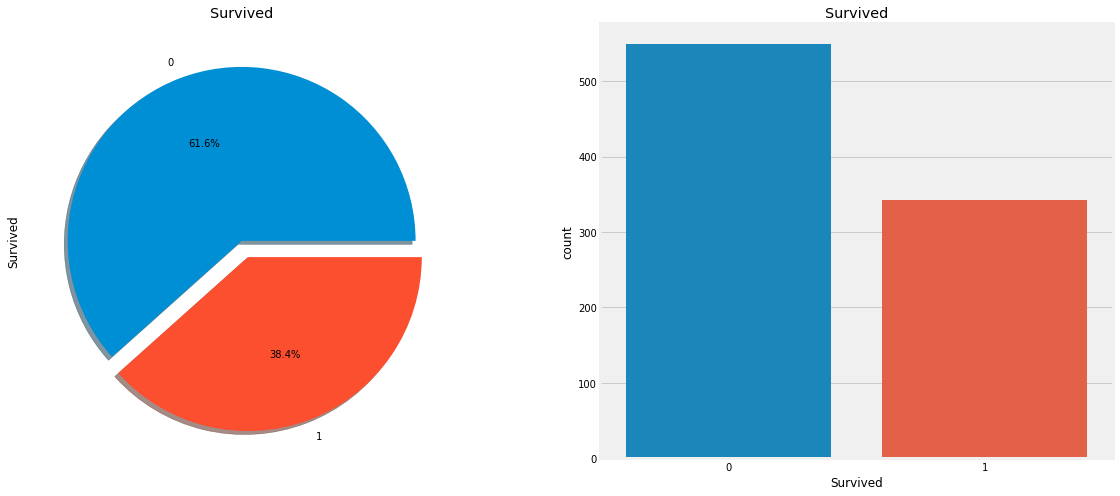

In [224]:
f, ax = plt.subplots(1,2,figsize=(18,8)) #1행2열의 subplot 생성

#그려지는 그래프가 다름
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survived')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')

Train set의 승객 중, 38.4%만이 생존하였음

Types of Features
-범주형 피처: Sex, Embarked
범주형 피처는 두 개 혹은 그 이상의 값을 가진 피처로, 예를 들어 성별은 남, 여 이렇게 두가지 피처가 있다. 이런 척도는 명목척도라고도 한다.
-서열형 피처: Pclass
서열형 피처는 범주형 피처와 유사하지만 그 값들이 상대적 순서가 존재한다. 예를 들어 이 데이터 세트에 있는 Pclass 는 1등석, 2등석, 3등석로 분류 된다.
-연속형 피처: Age
연속형 피처는 말그대로 숫자가 연속형인 경우이다. 원래는 나이는 28.3세 이런 것은 없지만 이 데이터 세트에는 존재한다.

2-1. 성별에 따른 생존

In [225]:
#성별과 생존율에 따라서 생존자 수를 계산함
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sex:Survived vs Dead')

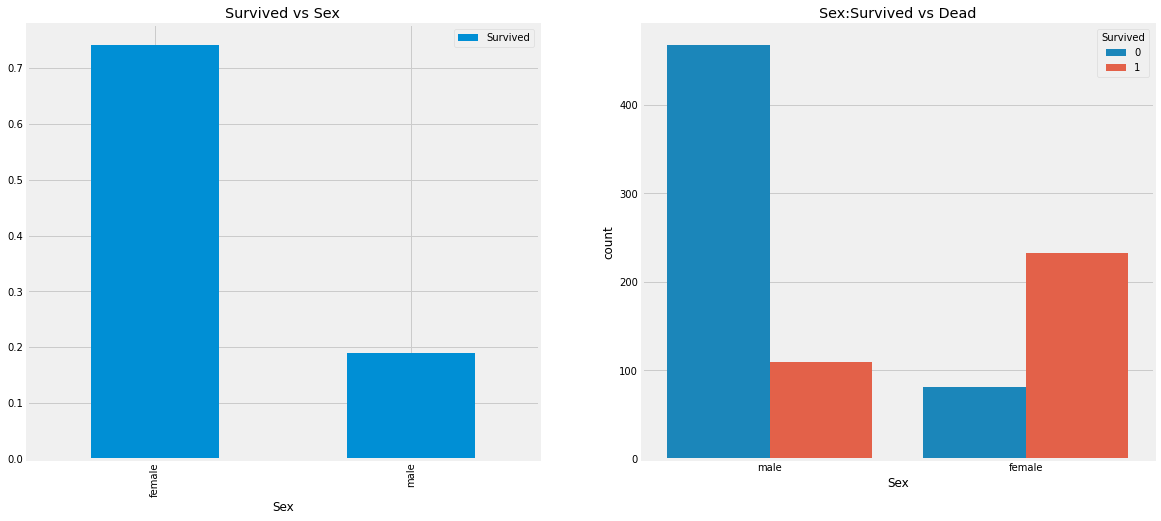

In [226]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

배에 탑승한 승객은 남성이 많지만, 생존자 수는 여성이 남성보다 많음

2-2. Pclass(객실의 등급)에 따른 생존

In [227]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='winter')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

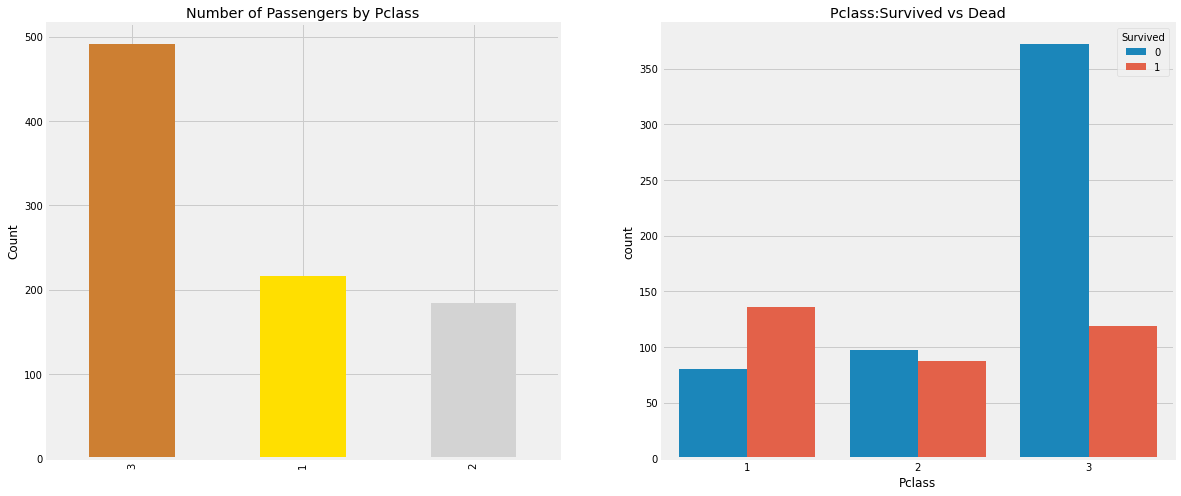

In [228]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived',data = data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

3등급 객실의 승객이 수도 많고, 사망자도 많다. 1등급 객실의 생존율이 가장 높다.

성별, 객실 등급, 생존여부를 같이 확인하면 아래와 같다.

In [229]:
pd.crosstab([data.Sex, data.Survived],data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


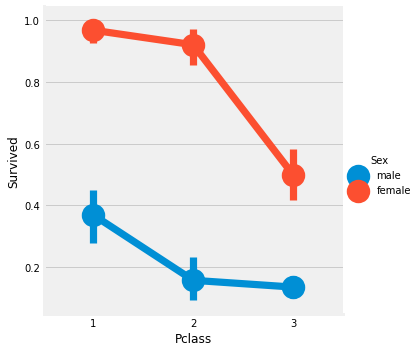

In [230]:
#평균 꺽은선 그래프 생성
sns.factorplot('Pclass','Survived',hue='Sex',data=data)

1등급 객실의 여성 승객은 94명 중 3명만 사망했기에 가장 생존률이 높다.

2-3. 나이에 따른 생존율

In [231]:
print(f'나이가 가장 많은 승객: {data.Age.max()} 살')
print(f'나이가 가장 어린 승객: {data.Age.min()} 살')
print(f'승객들의 평균 나이: {np.round(data.Age.mean(),2)} 살')

나이가 가장 많은 승객: 80.0 살
나이가 가장 어린 승객: 0.42 살
승객들의 평균 나이: 29.7 살


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


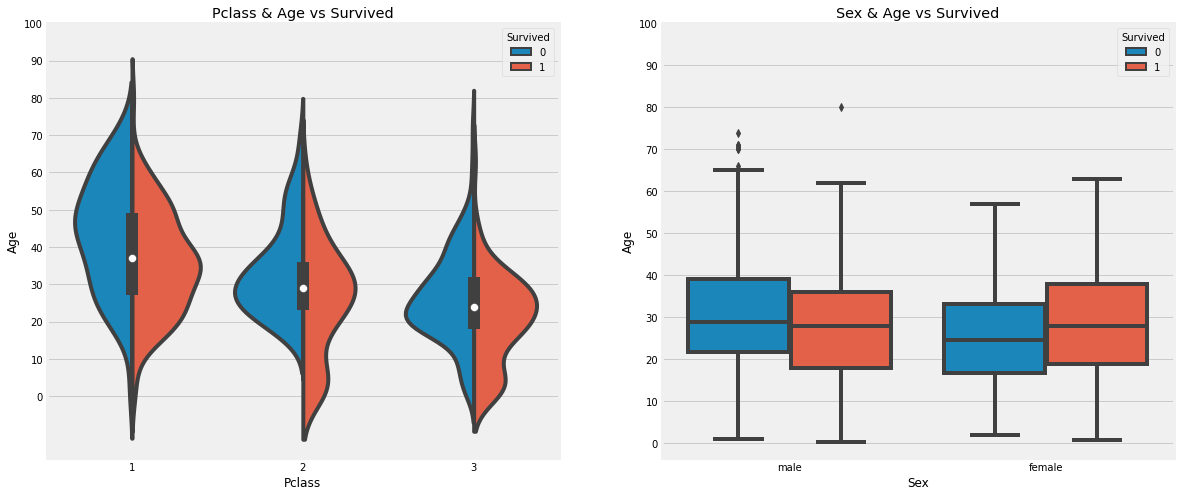

In [232]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data =data, split=True, ax=ax[0])
ax[0].set_title('Pclass & Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.boxplot('Sex','Age', hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Sex & Age vs Survived')
ax[1].set_yticks(range(0,110,10))


객실 등급이 낮아질수록 어린이의 수가 증가한다.
1등급 객실의 20-50대 승객의 생존률이 높다.
남성은 나이가 많을수록 사망률이 높다.

-sparse한 이름을 대체하여 전처리 수행하기

In [233]:
data['Initial']=0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
pd.crosstab(data.Sex, data.Initial).style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Initial의 범주가 매우 많기 때문에 Miss, Mr, Mrs, Other로 대체한다.

In [234]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [235]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

-나이 177개의 값 전처리 수행하기

In [236]:
#위의 코드에서 편균한 나이로 Null값을 채움
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'), 'Age'] = 35
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age'] = 45

In [237]:
data.Age.isnull().sum()

0

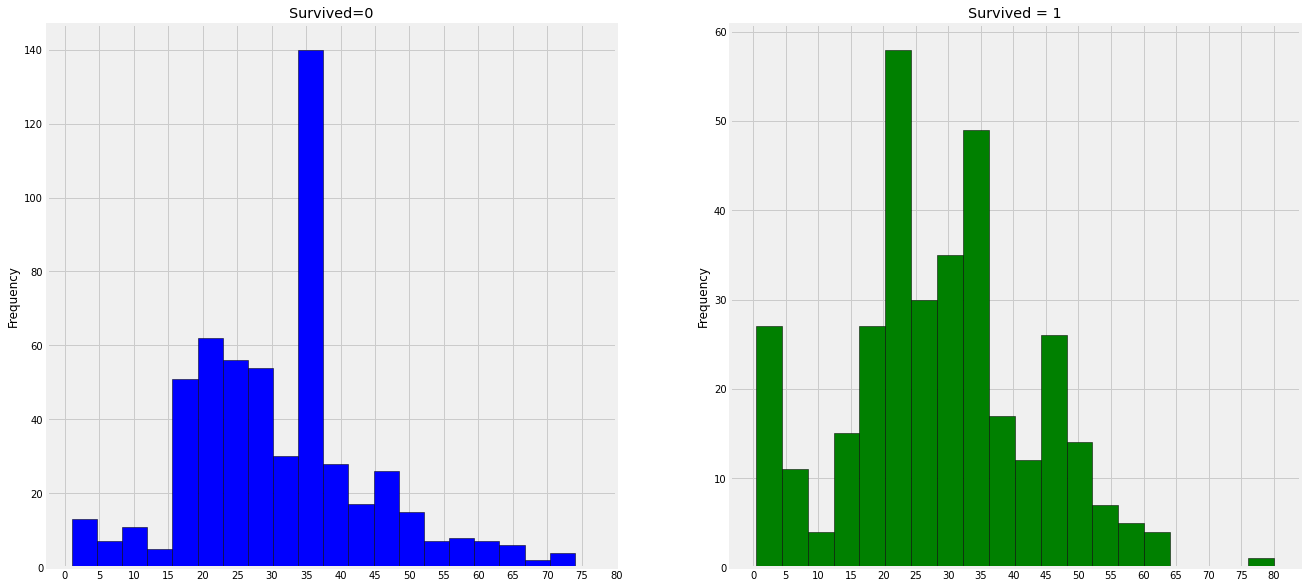

In [238]:
f, ax= plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black',color='blue')
ax[0].set_title('Survived=0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1) #눈금선 설정

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(x1)

C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


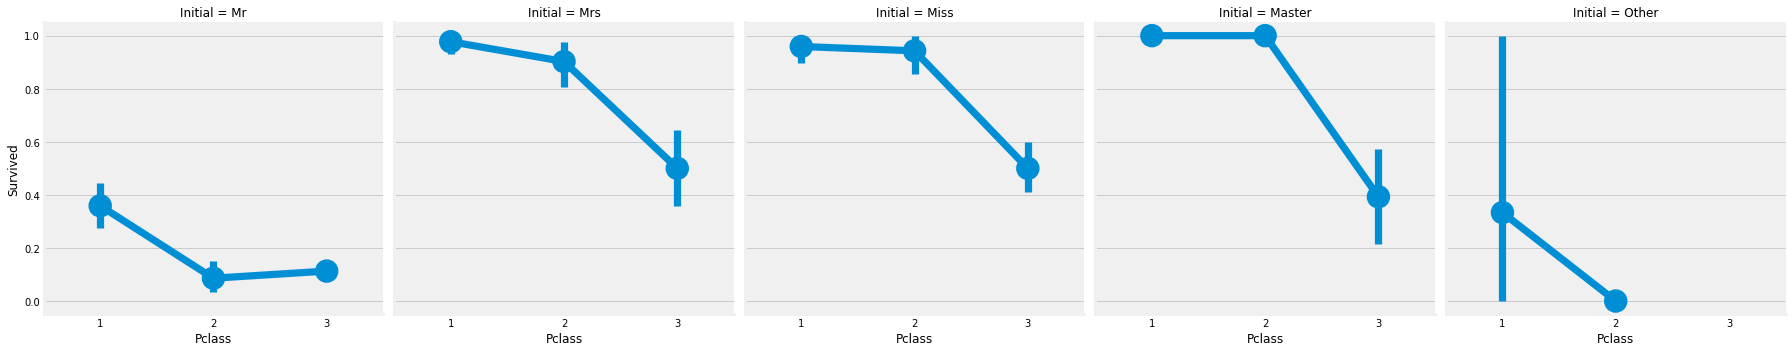

In [239]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)

2-4. 탑승 지역(Embarked) 별 생존율

In [240]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


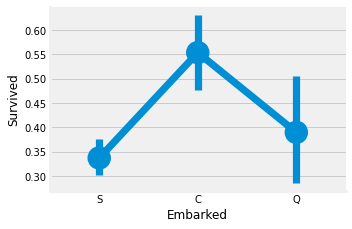

In [241]:
sns.factorplot('Embarked','Survived',data=data)
#아래 코드는 figure의 사이즈 설정
fig = plt.gcf()
fig.set_size_inches(5,3)

S에서 탑승한 승객의 생존률이 가장 낮고, C에서 탑승한 승객의 생존률이 가장 높다

C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\U

Text(0.5, 1.0, 'Embarked vs Pclass')

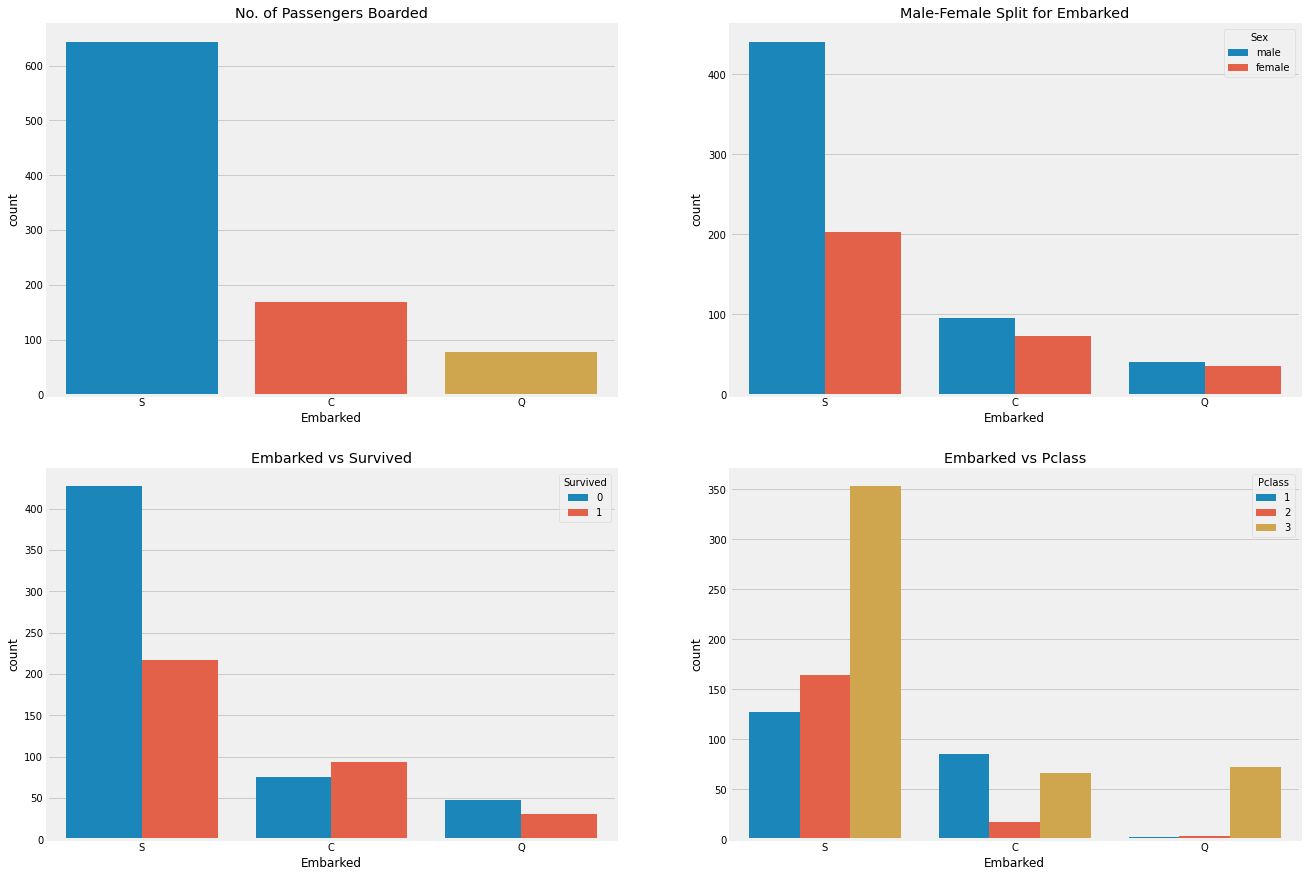

In [242]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

-S에서 탑승한 승객의 수가 가장 많고 그들은 대부분 3등급 승객이다.
-C에서 탑승한 승객의 생존률이 높은 이유는 아마 그들이 1등급 승객의 비율이 높기 때문이다.
-Q에서 탑승한 승객의 대부분은 3등급 승객이다.

C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


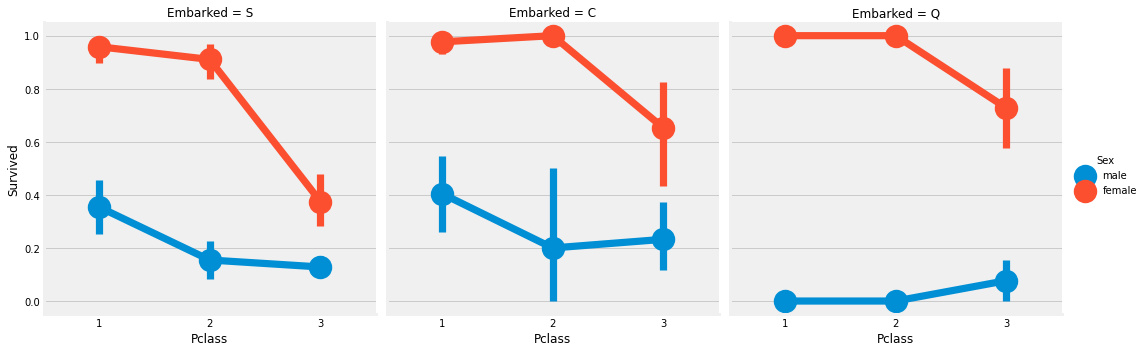

In [243]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)

Q에서 탑승한 승객은 대부분 3등급 승객이므로 남성의 생존률이 낮게 나타난다

-Embarked 2개의 값 null 대체 전처리 수행

In [244]:
data['Embarked'].fillna('S',inplace=True)
data['Embarked'].isnull().sum()

0

2-5. 함께 탐승한 형제자매, 아내, 남편의 수(SibSp) 별 생존율

In [245]:
pd.crosstab(data['Survived'], data['SibSp']).style.background_gradient(cmap='summer_r')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'SibSp vs Survived')

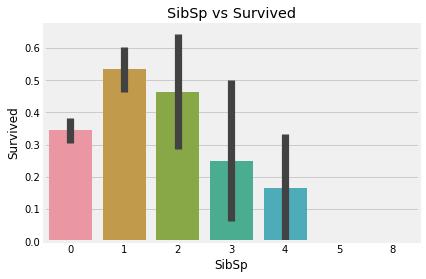

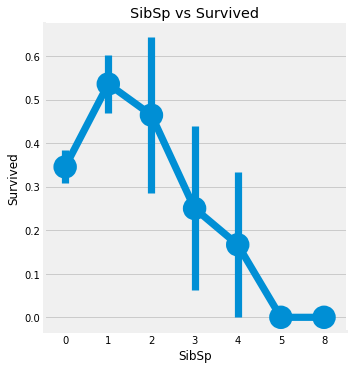

In [246]:
sns.barplot('SibSp','Survived',data=data)
plt.title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data)
plt.title('SibSp vs Survived')

In [247]:
pd.crosstab(data['Pclass'], data['SibSp']).style.background_gradient(cmap='summer_r')

SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,137,71,5,3,0,0,0
2,120,55,8,1,0,0,0
3,351,83,15,12,18,5,7


혼자 탑승한 경우 생존률이 높고, 형제/자매/배우자 수가 1,2명일때가 3명 이상일때보다 생존률이 높다.
5이상의 생존률이 0%인 이유는 모두 3등급 승객이기 때문이다.

2-6. 함께 탐승한 부모, 자식의 수(Parch) 별 생존율

In [248]:
pd.crosstab(data['Parch'],data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'Parch vs Survived')

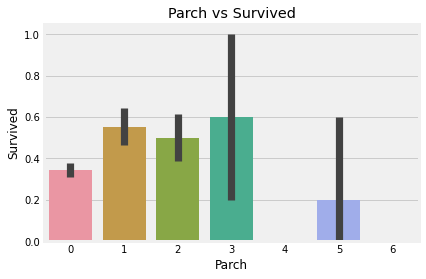

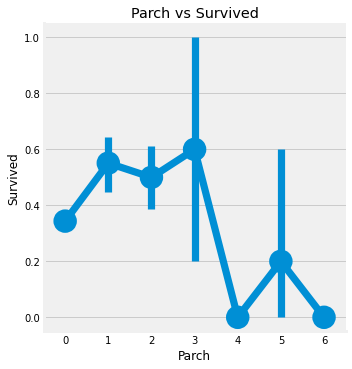

In [249]:
sns.barplot('Parch', 'Survived', data=data)
plt.title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data)
plt.title('Parch vs Survived')

1~3명 가족의 승객 생존률이 혼자와 그 이상 가족의 생존률보다 높음

2-7. 요금(Fare) 별 생존율

In [250]:
print(f'가장 비싼 요금: {data.Fare.max()}')
print(f'가장 싼 요금: {data.Fare.min()}')
print(f'요금의 평균: {np.round(data.Fare.mean(), 4)}')

가장 비싼 요금: 512.3292
가장 싼 요금: 0.0
요금의 평균: 32.2042


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

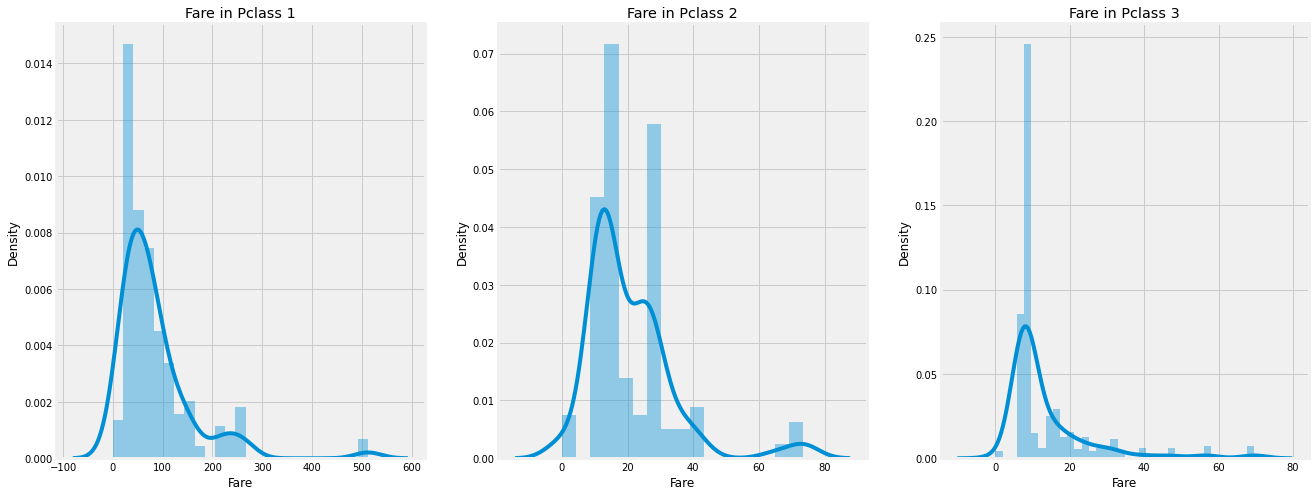

In [251]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
for i in range(3):
    sns.distplot(data[data['Pclass']==i+1]['Fare'], ax=ax[i])
    ax[i].set_title(f'Fare in Pclass {i+1}')

1등급의 요금이 2,3등급 요금보다 비쌈

2장 정리
- 성별 : 여성의 생존률이 남성보다 높음
- Pclass : 1>2>3 순서로 생존률에 차이가 확인됨
- Age : 10세 미만의 생존률이 높고, 15-35세의 사망률 높음
- Embarked : 1등급 승객이 많은 C 승객의 생존률이 높음
- Parch & SibSp: 1-2명의 형제/자매가 있거나 1-3명의 부모/자식이 있는 승객의 생존률이 혼자거나 대가족인 경우보다 높음

3장 데이터 전처리 + 특징 정리

3-1. Age_band 특징 생성
Age는 연속형 변수이기 때문에 ML 모델에 영향을 많이줌.
따라서 카테고리형 변수로 변환해줌.
80살이 최고 나이였기에 16으로 나누며 5등분해줌.

In [252]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [253]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


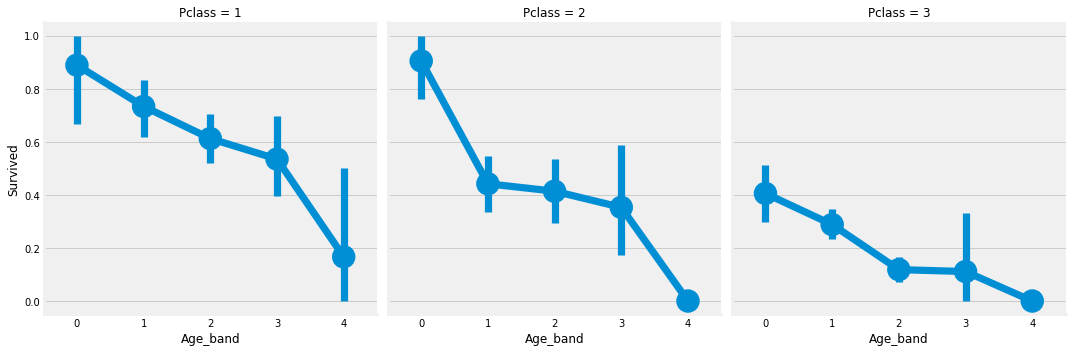

In [254]:
sns.factorplot('Age_band','Survived',col='Pclass',data=data)

class와 관계없이 나이가 들수록 생존률이 감소한다.

3-2. Family size and alone
Family size는 Parch와 SibSp를 이용해서 만들 수 있음

C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catp

Text(0.5, 1.0, 'Alone vs Survived')

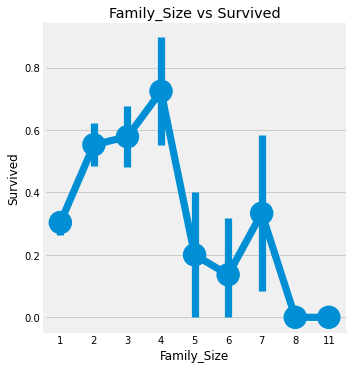

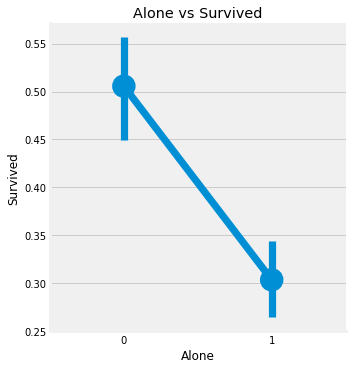

In [255]:
data['Family_Size'] = 0
data['Alone'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] + 1
data.loc[data['Family_Size']==1, 'Alone'] = 1

sns.factorplot('Family_Size', 'Survived', data=data)
plt.title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data)
plt.title('Alone vs Survived')

혼자 탑승한 승객과 4인 이상 가족의 생존률이 저조한 것을 확인할 수 있음

C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


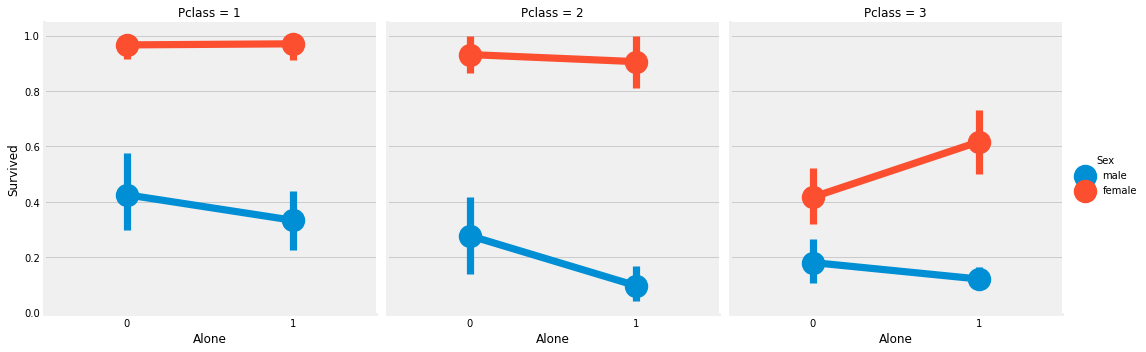

In [256]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')

1/3 등급의 여성 승객을 제외하고 혼자 탑승한 경우 생존률이 더 낮게 나타남

3-3. Fare_Range
fare 역시 연속형 변수임으로 4개로 카테고리화시킴

In [257]:
data['Fare_Range']=pd.qcut(data.Fare, 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


요금이 증가함에 따라서, 생존률도 증가함. Age_Band처럼 인코딩을 실시함

C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


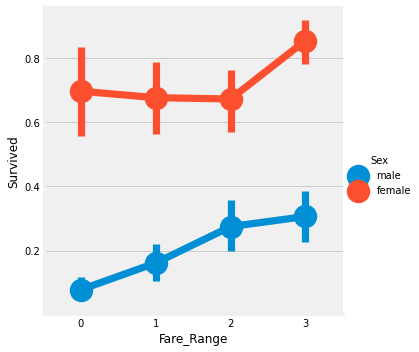

In [258]:
data['Fare_Range'] = 0
data.loc[data['Fare']<=7.91,'Fare_Range'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_Range'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_Range'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_Range'] = 3

sns.factorplot('Fare_Range', 'Survived', data=data, hue='Sex')

3-4. 문자열을 숫자형으로 변환
성별, Embarked, Initial과 같은 문자열을 숫자형으로 매핑함

In [259]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

3-5. 불필요한 특징 제거

In [260]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare', 'PassengerId'], axis=1, inplace=True)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'Survived'),
  Text(0, 1.5, 'Pclass'),
  Text(0, 2.5, 'Sex'),
  Text(0, 3.5, 'SibSp'),
  Text(0, 4.5, 'Parch'),
  Text(0, 5.5, 'Embarked'),
  Text(0, 6.5, 'Initial'),
  Text(0, 7.5, 'Age_band'),
  Text(0, 8.5, 'Family_Size'),
  Text(0, 9.5, 'Alone'),
  Text(0, 10.5, 'Fare_Range')])

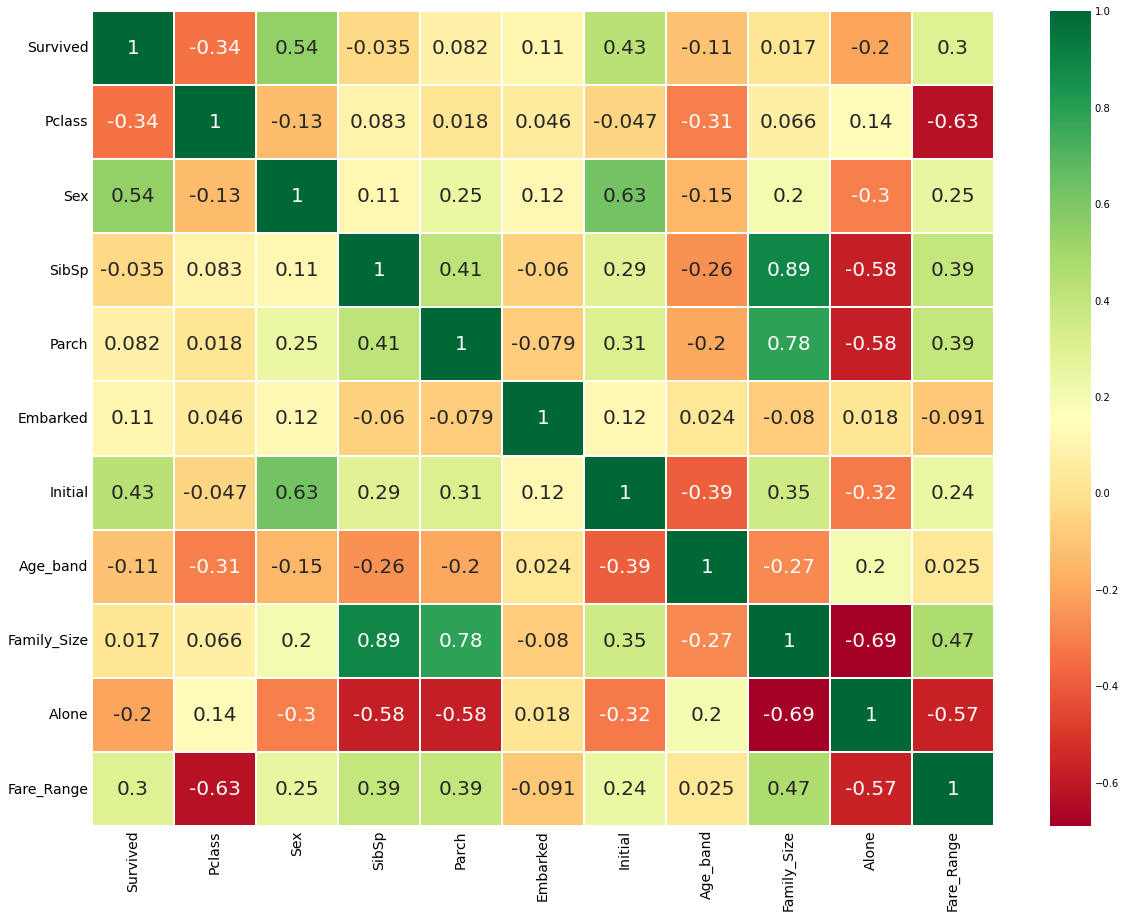

In [261]:
data.corr()

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

4. ML 알고리즘

1. Logistic Regression
2. Support Vector Machines(Linear and radial)
3. Random Forest
4. K-Nearest Neighbours
5. Naive Bayes
6. Decision Tree

In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [263]:
X = data.drop(['Survived'],axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

4-1. Radial Support Vector Machines(rbf-SVM)

In [264]:
model = svm.SVC(kernel='rbf', gamma=0.1)
model.fit(X_train, y_train)
prediction1 = model.predict(X_test)
print(f'Accuracy of the rbf SVM: {metrics.accuracy_score(prediction1, y_test)}')

Accuracy of the rbf SVM: 0.8379888268156425


4-2. Linear Support Vector Machines(linear-SVM)

In [267]:
model=svm.SVC(kernel='linear',C=0.1, gamma=0.1)
model.fit(X_train, y_train)
prediction2 = model.predict(X_test)
print(f'Accuracy of the rbf SVM: {metrics.accuracy_score(prediction2, y_test)}')

Accuracy of the rbf SVM: 0.7821229050279329


4-3. Logistic Regression

In [268]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction3 = model.predict(X_test)
print(f'Accuracy of the rbf SVM: {metrics.accuracy_score(prediction3, y_test)}')

Accuracy of the rbf SVM: 0.7821229050279329


4-4. Decision Tree

In [269]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction4 = model.predict(X_test)
print(f'Accuracy of the rbf SVM: {metrics.accuracy_score(prediction4, y_test)}')

Accuracy of the rbf SVM: 0.8268156424581006


4-5. KNN

In [270]:
#k=5로 default되어있음
model = KNeighborsClassifier()
model.fit(X_train, y_train)
prediction5 = model.predict(X_test)
print(f'Accuracy of the rbf SVM: {metrics.accuracy_score(prediction5, y_test)}')

Accuracy of the rbf SVM: 0.8100558659217877


Accuracies of different values of n are:
 [0.68715084 0.75977654 0.81005587 0.82122905 0.81005587 0.84357542
 0.81005587 0.83240223 0.81005587 0.82122905] 
with the max value as 0.8435754189944135


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


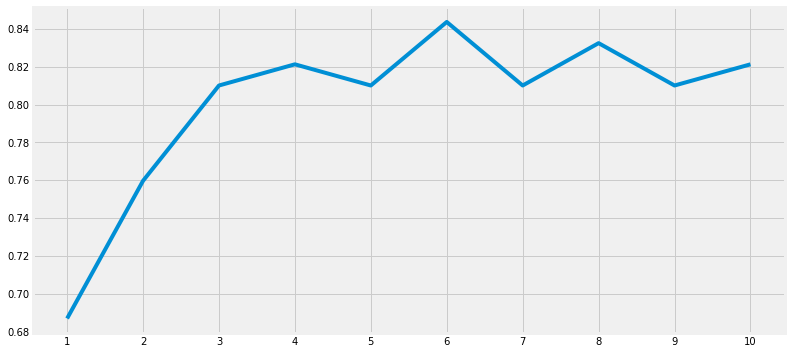

In [272]:
#k를 변경하며 test 진행
x = list(range(1, 11))
a = pd.Series()
for i in x:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
plt.plot(x, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12, 6)
print(f'Accuracies of different values of n are:\n {a.values} \nwith the max value as {a.values.max()}')

4-6. Gaussian Naive Bayes

In [273]:
model = GaussianNB()
model.fit(X_train, y_train)
prediction6 = model.predict(X_test)
print(f'Accuracy of the rbf SVM: {metrics.accuracy_score(prediction6, y_test)}')

Accuracy of the rbf SVM: 0.7653631284916201


4-7. Random Forest

In [274]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
prediction7 = model.predict(X_test)
print(f'Accuracy of the rbf SVM: {metrics.accuracy_score(prediction7, y_test)}')

Accuracy of the rbf SVM: 0.8379888268156425


4-8. K-fold Cross Validation

In [276]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score

kfold = KFold(n_splits=10)
xyz = []
accuracy = []
std = []
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'std': std}, index=classifiers)
new_models_dataframe2

,CV Mean,std
Linear SVM,0.793471,0.047797
Radial SVM,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813770,0.042219
Decision Tree,0.807004,0.028838
Naive Bayes,0.801386,0.028999
Random Forest,0.814844,0.031678


<AxesSubplot:>

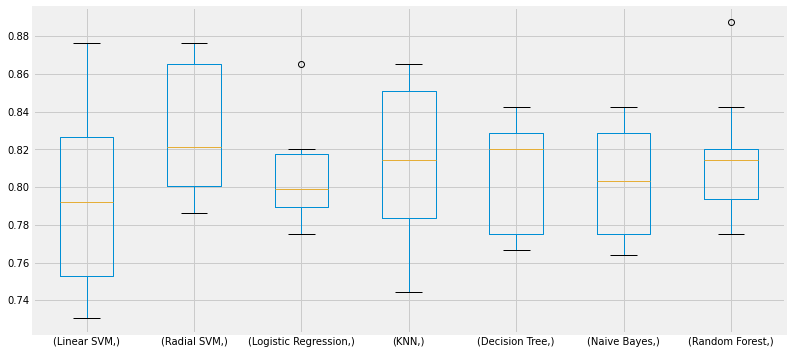

In [277]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

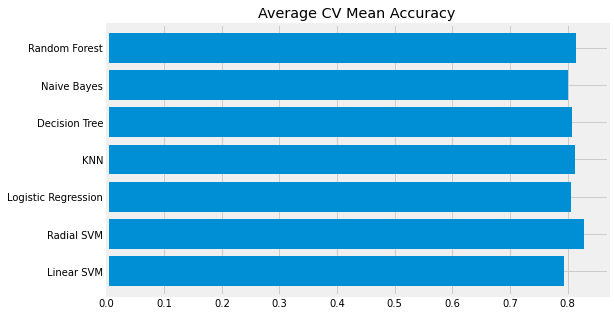

In [278]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)

5.오차 행렬

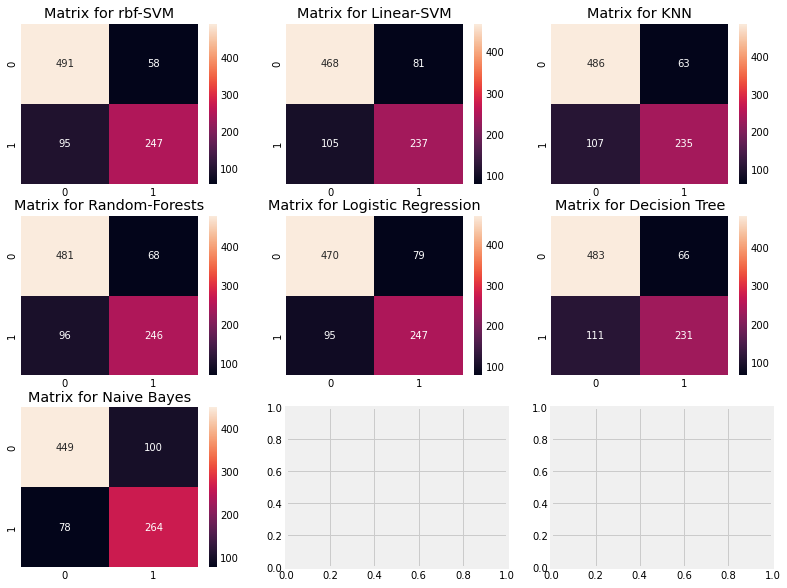

In [279]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)

6. 하이퍼 파라미터 튜닝

In [280]:
#6-1. SVM
from sklearn.model_selection import GridSearchCV

C = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}

gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, y)

print(gd.best_score_)
print(gd.best_params_)


Fitting 5 folds for each of 220 candidates, totalling 1100 fits
0.8282593685267716
{'C': 0.4, 'gamma': 0.3, 'kernel': 'rbf'}


In [281]:
#6-2. Random Forest

n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, y)

print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
{'n_estimators': 300}


7. Ensemble
-Voting
-Bagging
-Boosting

In [282]:
#7-1. Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                               ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.6, gamma=0.1)),
                                               ('RFor', RandomForestClassifier(n_estimators=900, random_state=0)),
                                               ('LR', LogisticRegression(C=0.05)),
                                               ('DT', DecisionTreeClassifier(random_state=0)),
                                               ('NB', GaussianNB()),
                                               ('svm', svm.SVC(kernel='linear', probability=True))
                                               ], voting='soft').fit(X_train, y_train)
print(f'The Accuracy for Ensembled Model is: {ensemble_lin_rbf.score(X_test, y_test)}')
cross = cross_val_score(ensemble_lin_rbf, X, y, cv=10, scoring='accuracy')
print(f'The cross validated score is: {cross.mean()}')

The Accuracy for Ensembled Model is: 0.8324022346368715
The cross validated score is: 0.8226716604244693


In [284]:
#7-2. bagging
#7-2-1. KNN

from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f'The Accuracy for Bagged KNN: {metrics.accuracy_score(prediction, y_test)}')
result = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(f'The cross validated score is: {result.mean()}')

#7-2-2. Decision Tree
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(f'The Accuracy for Bagged Decision Tree: {metrics.accuracy_score(prediction, y_test)}')
result = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(f'The cross validated score is: {result.mean()}')

The Accuracy for Bagged KNN: 0.8100558659217877
The cross validated score is: 0.8104244694132333
The Accuracy for Bagged Decision Tree: 0.8268156424581006
The cross validated score is: 0.8171410736579275


In [288]:
#7-3. boosting
#7-3-1. AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, y, cv=10, scoring='accuracy')
print(f'The cross validated score for AdaBoost is: {result.mean()}')

#7-3-2. Strochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, y, cv=10, scoring='accuracy')
print(f'The cross validated score for Gradient Boosting is: {result.mean()}')

#7-3-3. XGBoost
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, y, cv=10, scoring='accuracy')
print(f'The cross validated score for XGBoost is: {result.mean()}')

#AdaBoost 하이퍼파라미터 튜닝
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
hyper = {'n_estimators': n_estimators,
        'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

The cross validated score for AdaBoost is: 0.8249188514357055
The cross validated score for Gradient Boosting is: 0.8115230961298376
[01:45:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:45:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:45:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:45:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:45:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:45:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:45:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:45:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:45:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:45:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The cross validated score for XGBoost is: 0.8160299625468165
Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


<AxesSubplot:>

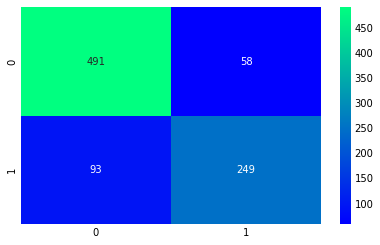

In [289]:
#7-4. 최고 성능 모델에 대한 오차행렬
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')

8. 모델별 특징의 중요도

C:\Users\USER\anaconda3\envs\dacon\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:50:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Text(0.5, 1.0, 'Feature Importance in XgBoost')

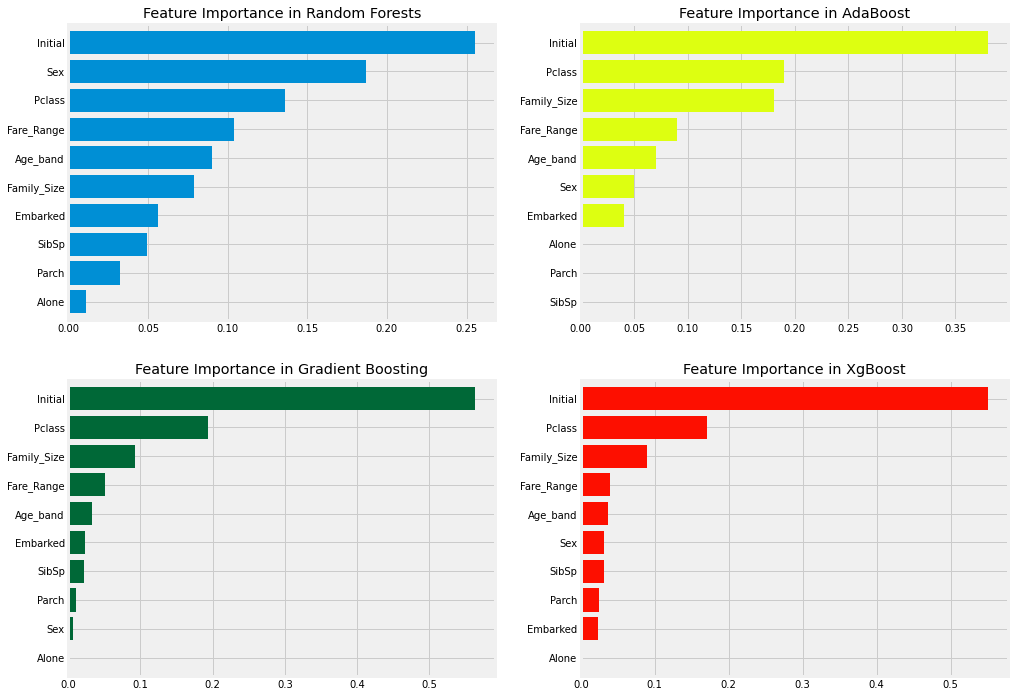

In [290]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))
model = RandomForestClassifier(n_estimators=300, random_state=0)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')